In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history/athlete_events_data_dictionary.csv
/kaggle/input/120-years-of-olympic-history/country_definitions.csv
/kaggle/input/120-years-of-olympic-history/athlete_events.csv
/kaggle/input/120-years-of-olympic-history/country_definitions_data_dictionary.csv


In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
df_origin = pd.read_csv("/kaggle/input/120-years-of-olympic-history/athlete_events.csv")
df = df_origin.copy()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [25]:
df.shape

(271116, 15)

In [26]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [27]:
df.info

<bound method DataFrame.info of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summe

In [28]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [30]:
numeric_df=df.select_dtypes(include=np.number)

In [31]:
numeric_df.isnull().sum()

ID            0
Age        9474
Height    60171
Weight    62875
Year          0
dtype: int64

In [32]:
numeric_df.fillna(numeric_df.mean(), inplace=True)
numeric_df.isnull().sum()

ID        0
Age       0
Height    0
Weight    0
Year      0
dtype: int64

I found that height, weight and Age have a lot of missing values. Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals. Let's replace these missing values by 'DNW'

In [33]:
df['Medal'].fillna('DNW', inplace = True)

In [34]:
df.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head()

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64

In [35]:
country = pd.read_csv('/kaggle/input/120-years-of-olympic-history/country_definitions.csv')
country.drop('notes', axis = 1 , inplace = True)
country.rename(columns = {'region':'Country'}, inplace = True)
country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [36]:
olympic_merge = df.merge(country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [37]:
olympic_merge.loc[olympic_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [38]:
olympic_merge['Country'] = np.where(olympic_merge['NOC']=='SGP', 'Singapore', olympic_merge['Country'])
olympic_merge['Country'] = np.where(olympic_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympic_merge['Country'])
olympic_merge['Country'] = np.where(olympic_merge['NOC']=='UNK', 'Unknown', olympic_merge['Country'])
olympic_merge['Country'] = np.where(olympic_merge['NOC']=='TUV', 'Tuvalu', olympic_merge['Country'])

In [39]:
olympic_merge.drop('Team', axis = 1, inplace = True)
olympic_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [40]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW


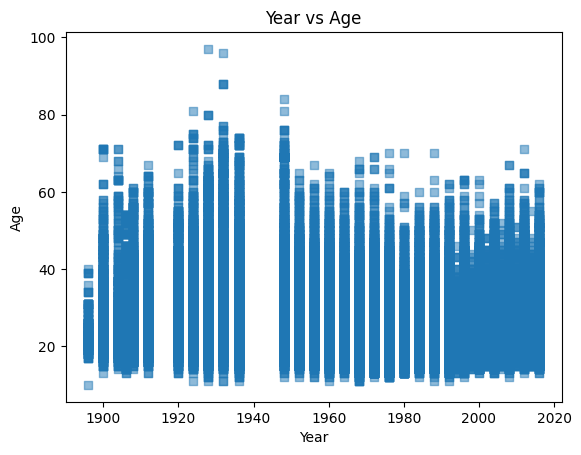

In [41]:
plt.scatter(df['Year'], df['Age'], alpha=0.5, marker='s', linestyle='solid')


plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Year vs Age')

plt.show()

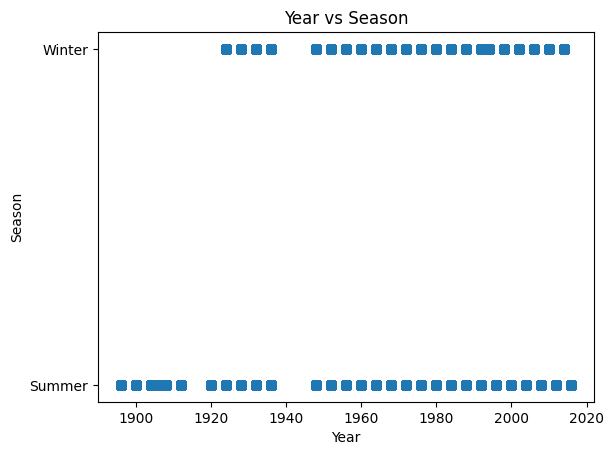

In [42]:
plt.scatter(df['Year'], df['Season'], alpha=0.5, marker='s', linestyle='solid')


plt.xlabel('Year')
plt.ylabel('Season')
plt.title('Year vs Season')

plt.show()

<Figure size 1400x600 with 0 Axes>

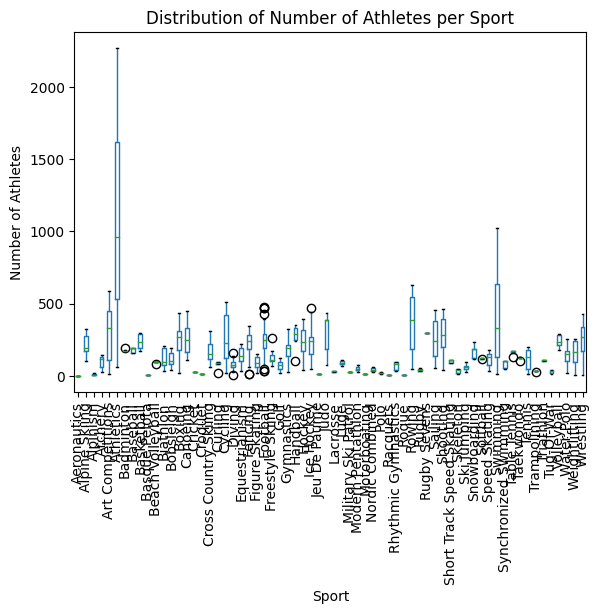

In [43]:

athletes_per_sport = df.groupby(['Year', 'Season', 'Sport'])['Name'].nunique()


df_ath = athletes_per_sport.reset_index()


plt.figure(figsize=(14,6))
boxplot = df_ath.boxplot(column='Name', by=['Sport'], grid=False)
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Number of Athletes per Sport')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

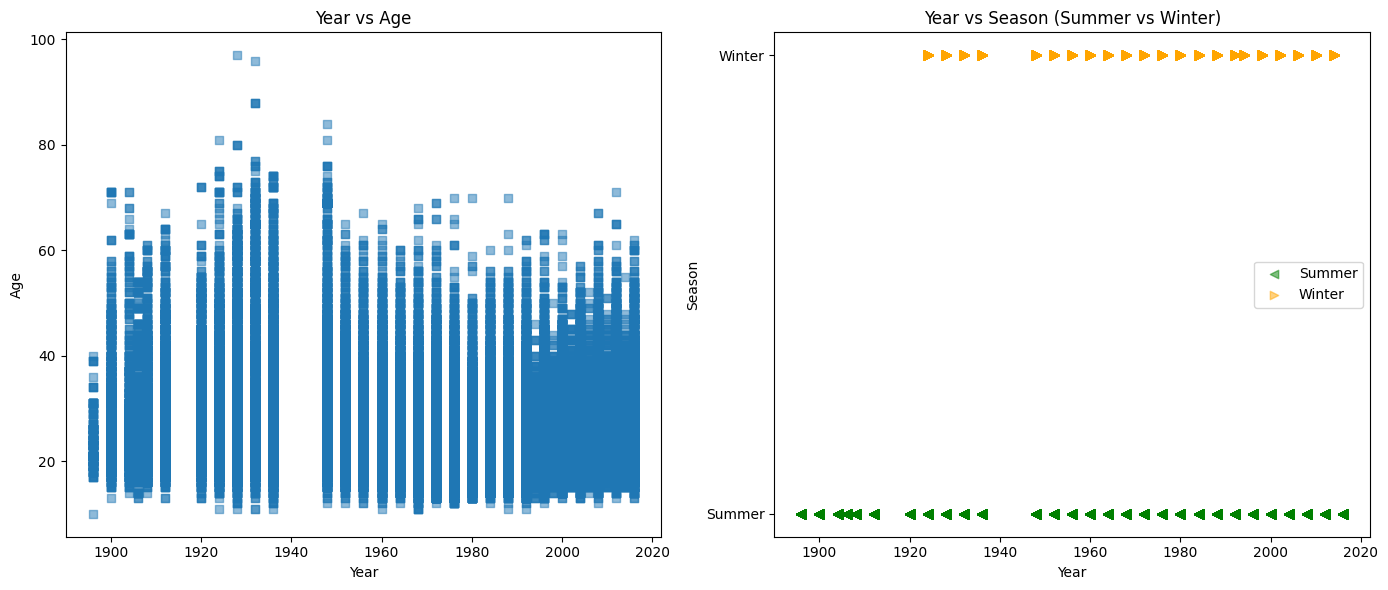

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axs[0].scatter(df['Year'], df['Age'], alpha=0.5, marker='s', linestyle='solid')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Age')
axs[0].set_title('Year vs Age')

axs[1].scatter(df[df['Season'] == 'Summer']['Year'], df[df['Season'] == 'Summer']['Season'], color='green', marker='<', label='Summer', alpha=0.5)
axs[1].scatter(df[df['Season'] == 'Winter']['Year'], df[df['Season'] == 'Winter']['Season'], color='orange', marker='>', label='Winter', alpha=0.5)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Season')
axs[1].set_title('Year vs Season (Summer vs Winter)')
axs[1].legend(loc='center right')

plt.tight_layout()
plt.show()

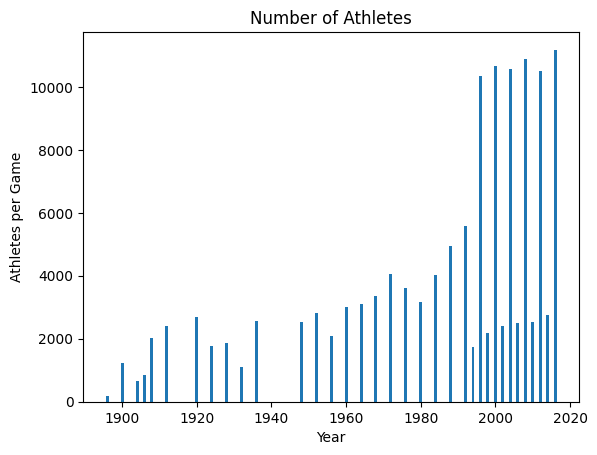

In [45]:
ath_per_game = df.groupby('Year')['ID'].nunique() / df.groupby('Year')['Games'].nunique()
plt.bar(ath_per_game.index, ath_per_game.values)

plt.xlabel('Year')
plt.ylabel('Athletes per Game')
plt.title('Number of Athletes')
plt.show()

/tmp/ipykernel_34/523209666.py:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



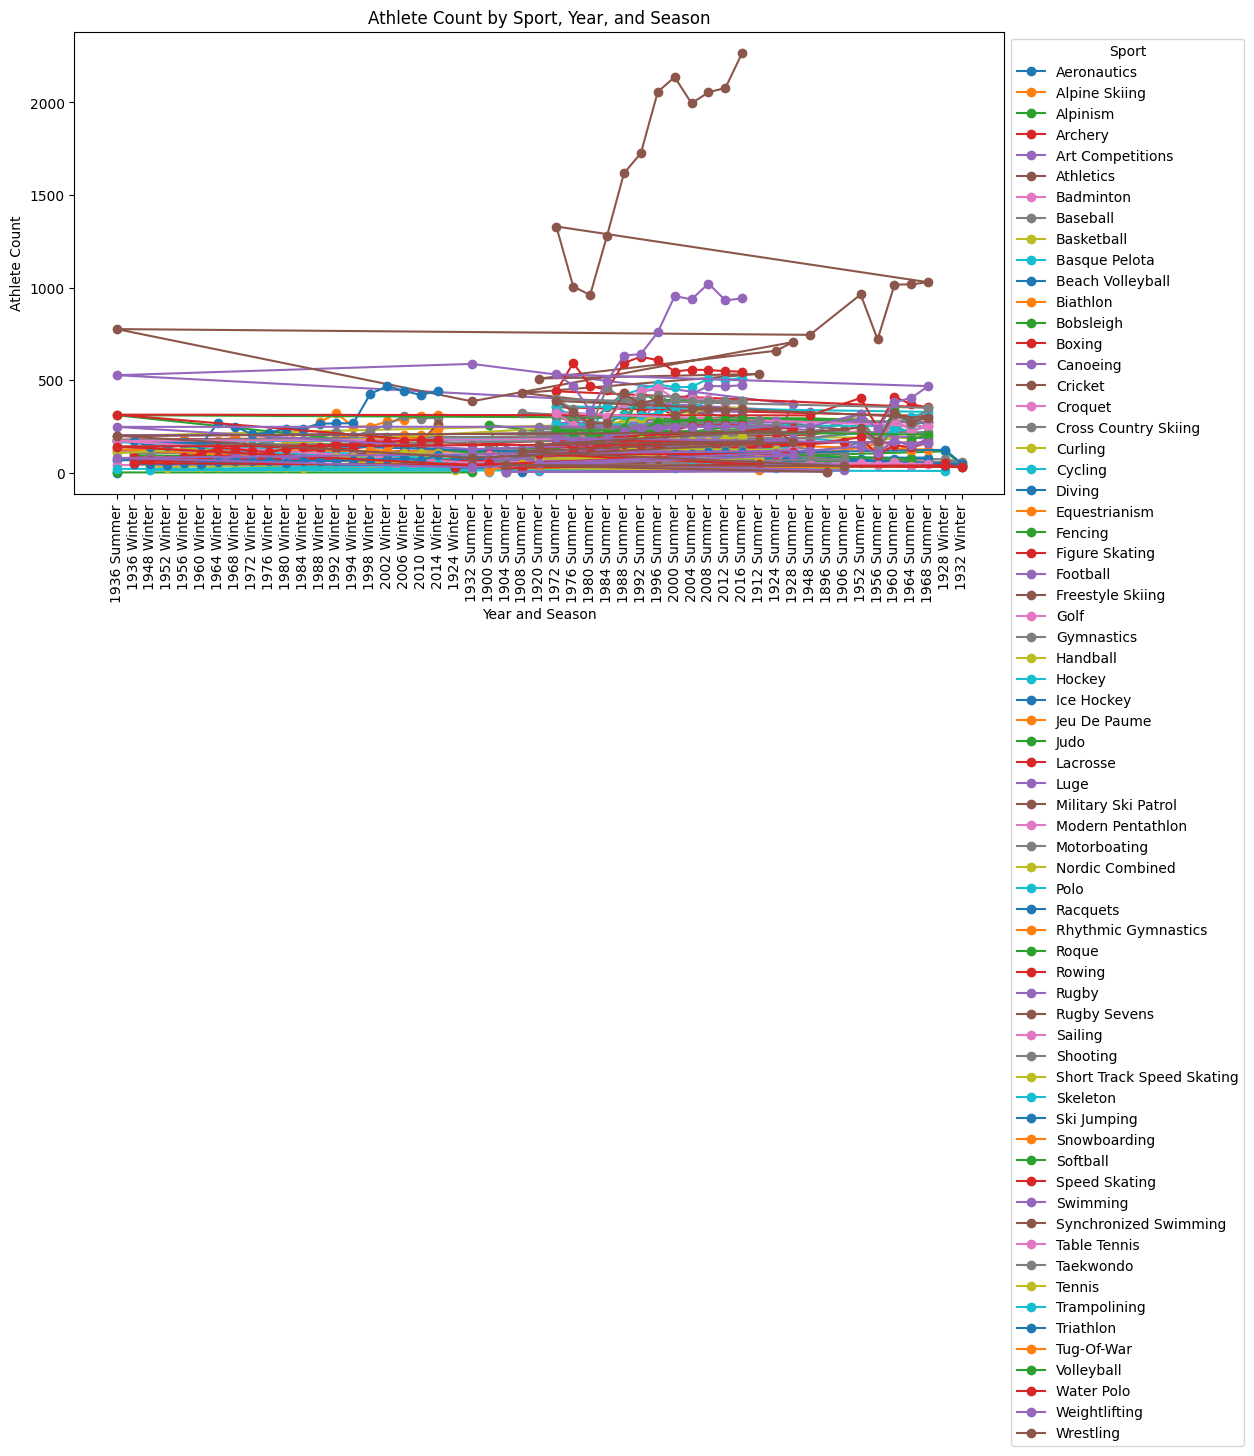

In [46]:
ath_counts = df.groupby(['Sport', 'Year', 'Season'])['Name'].nunique().reset_index()

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 6))

# Get the unique sports
sports = ath_counts['Sport'].unique()

# Plot a bar plot showing the number of athletes for each sport
for i, sport in enumerate(sports):
    sport_data = ath_counts[ath_counts['Sport'] == sport]
    x = sport_data['Year'].astype(str) + ' ' + sport_data['Season']
    y = sport_data['Name']
    ax.plot(x, y, marker='o', label=sport)

# Graph settings
ax.set_xlabel('Year and Season')
ax.set_ylabel('Athlete Count')
ax.set_title('Athlete Count by Sport, Year, and Season')
ax.legend(title='Sport', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [68]:
tmp = df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

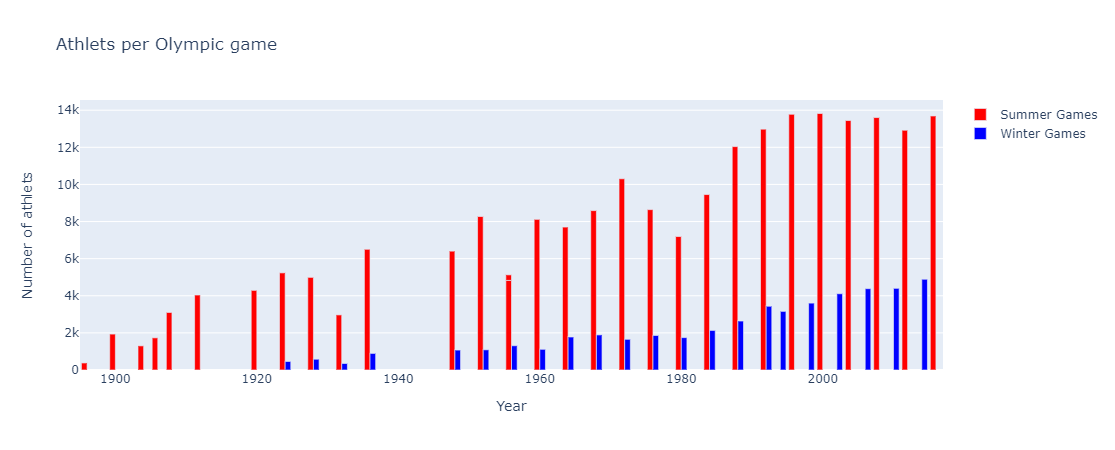

In [48]:
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    text=dfS['City']
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets3')

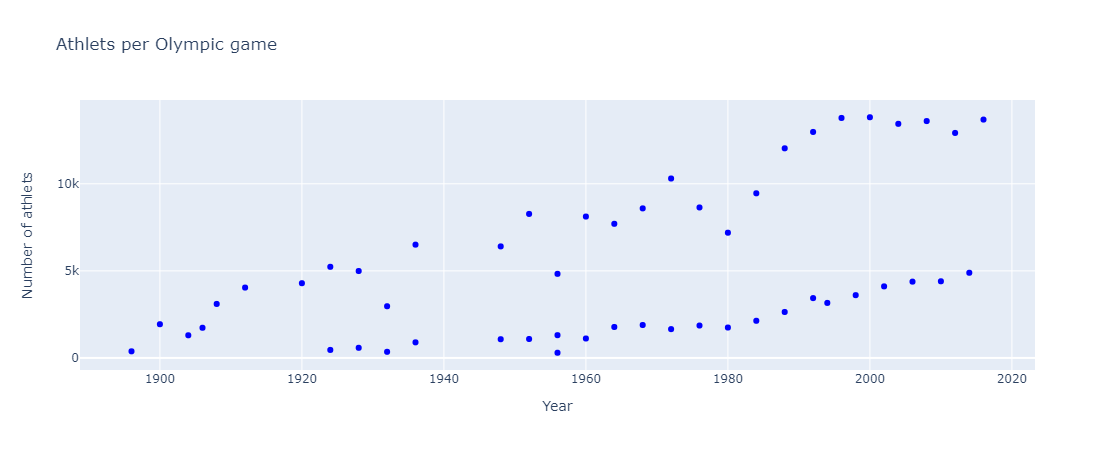

In [49]:
trace = go.Scatter(
    x = df['Year'],
    y = df['Athlets'],
    name="Athlets per Olympic game",
    marker=dict(
        color="Blue",
    ),
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets1')

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



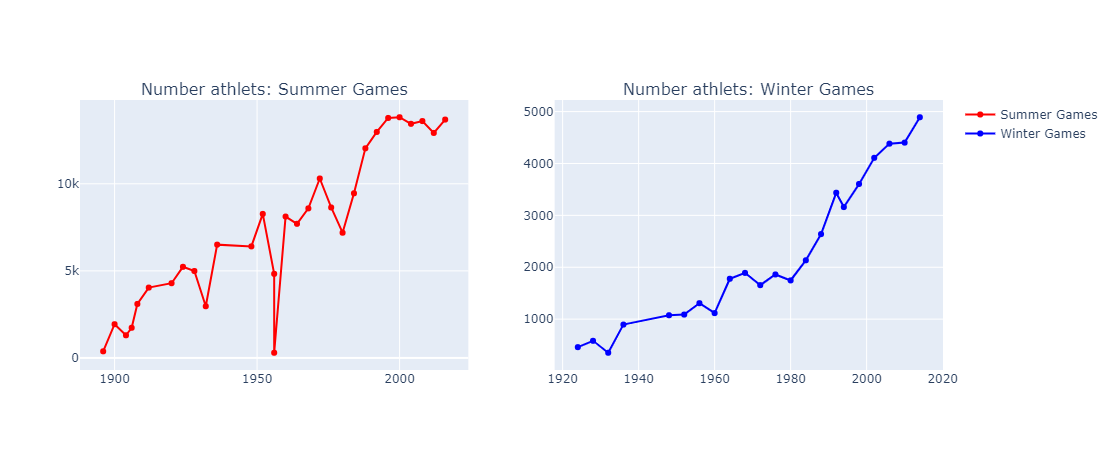

In [50]:

dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines",
    text=dfS['City'],
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines",
    text=dfW['City']
)

data = [traceS, traceW]

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Number athlets: Summer Games', 'Number athlets: Winter Games'))
fig.append_trace(traceS, 1, 1)
fig.append_trace(traceW, 1, 2)

iplot(fig, filename='events-athlets2')

In [64]:
df_plt=df_origin.copy()

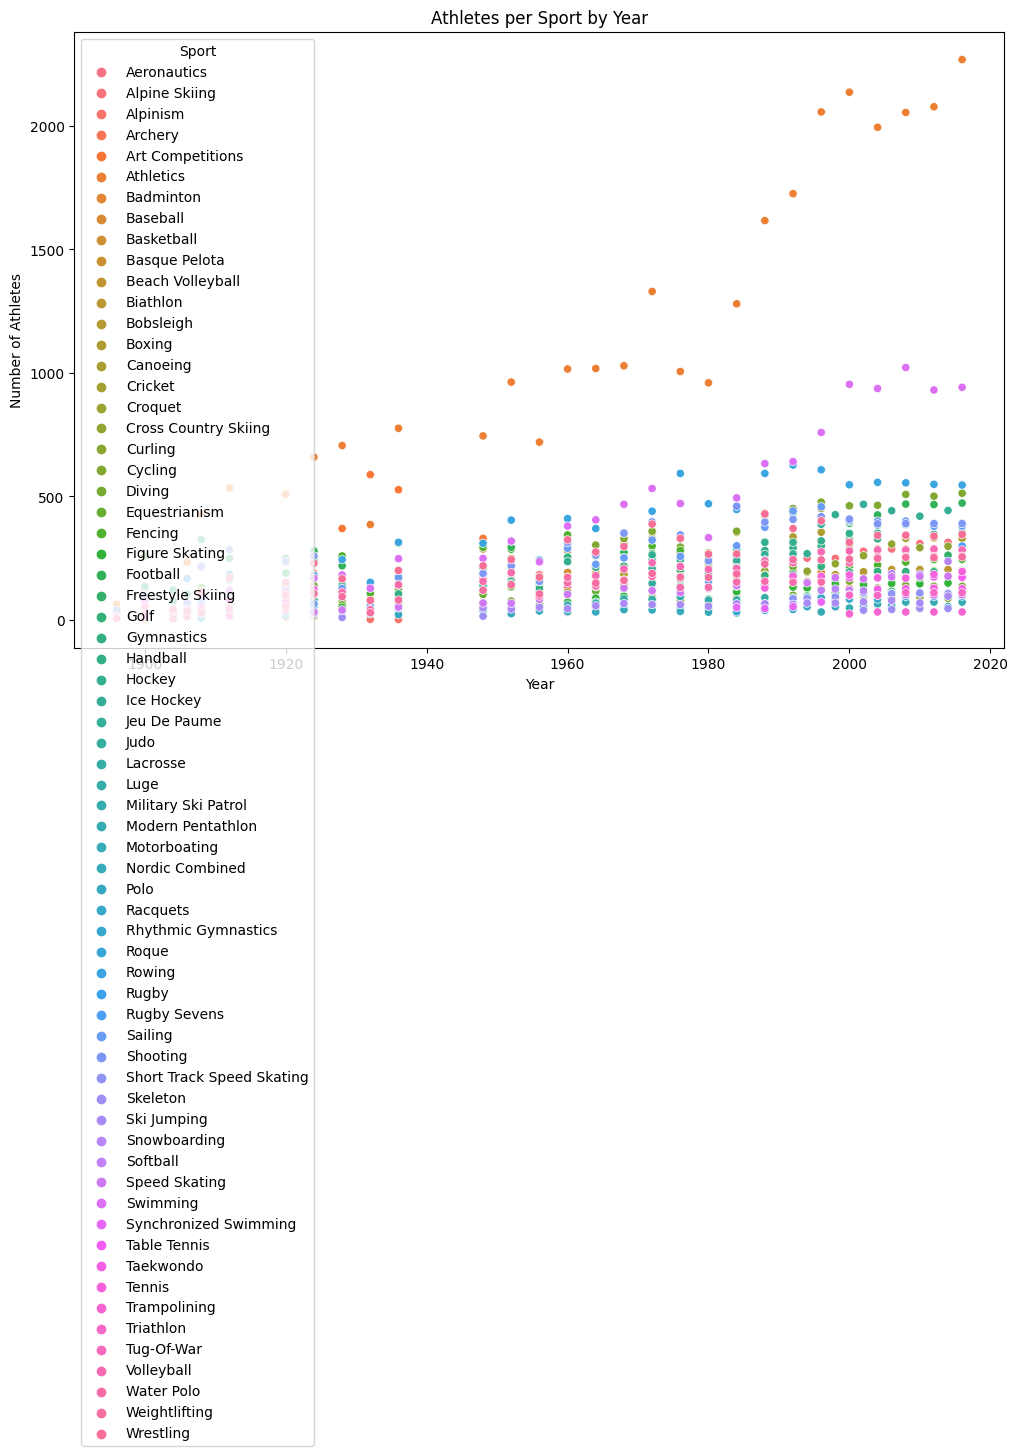

In [65]:
# Calculate the number of unique Names per Sport and Year
name_count_sport_year = df_plt.groupby(["Sport", "Year"])["Name"].nunique().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.scatterplot(x=name_count_sport_year["Year"], y=name_count_sport_year["Name"], hue=name_count_sport_year["Sport"])
plt.title("Athletes per Sport by Year")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")

# Display the scatter plot
plt.show()

In [80]:
tmp = df_plt.groupby(['Year', 'City','Season'])['Sport'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df.head()

,Year,City,Season,Sport,Athlets
0,1896,Athina,Summer,Athletics,106
1,1896,Athina,Summer,Gymnastics,97
2,1896,Athina,Summer,Shooting,65
3,1896,Athina,Summer,Cycling,41
4,1896,Athina,Summer,Tennis,23


In [76]:
sports = (df_plt.groupby(['Sport'])['Sport'].nunique()).index

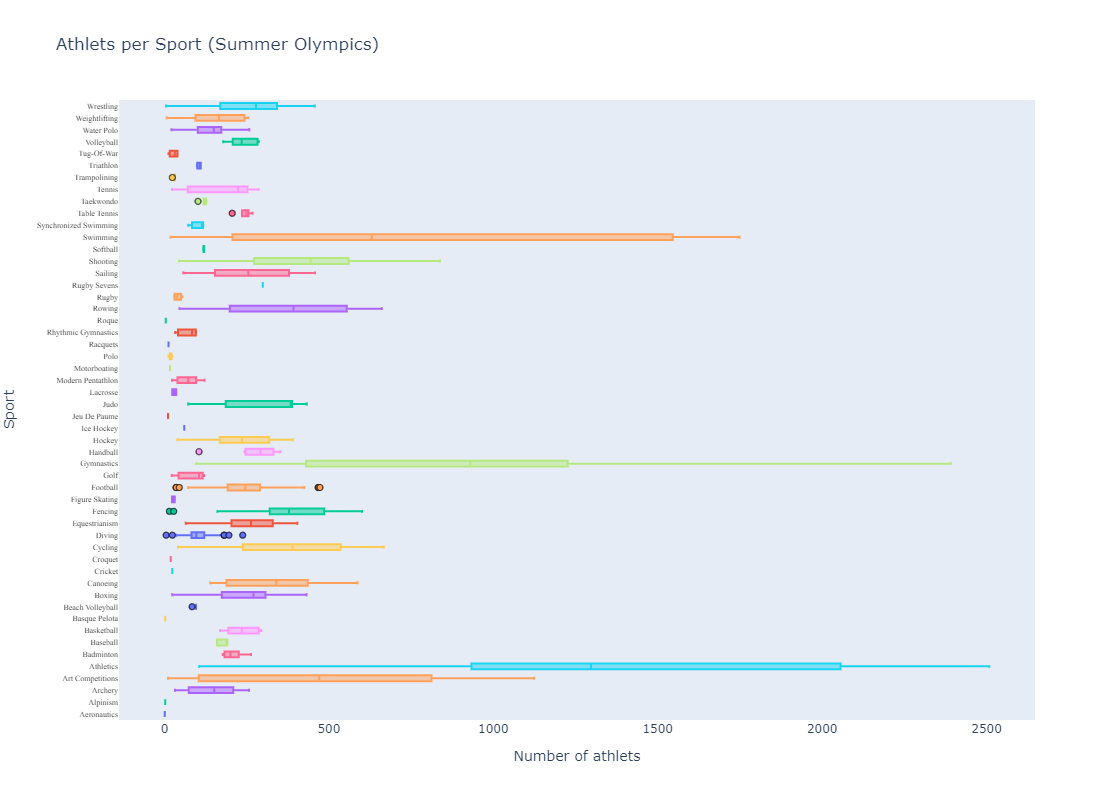

In [95]:
def draw_trace(dataset, sport):
    dfS = dataset[dataset['Sport']==sport];
    trace = go.Box(
        x = dfS['Athlets'],
        name=sport,
         marker=dict(
                    line=dict(
                        color='black',
                        width=0.8),
                ),
        text=dfS['City'], 
        orientation = 'h'
    )
    return trace
def draw_group(dataset, title,height=800):
    data = list()
    for sport in sports:
        data.append(draw_trace(dataset, sport))


    layout = dict(title = title,
              xaxis = dict(title = 'Number of athlets',showticklabels=True),
              yaxis = dict(title = 'Sport', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=8,
                color='black'),), 
              hovermode = 'closest',
              showlegend=False,
                  width=800,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='events-sports1')

# select only Summer Olympics
df_S = df[df['Season']=='Summer']
# draw the boxplots for the Summer Olympics
draw_group(df_S, "Athlets per Sport (Summer Olympics)")

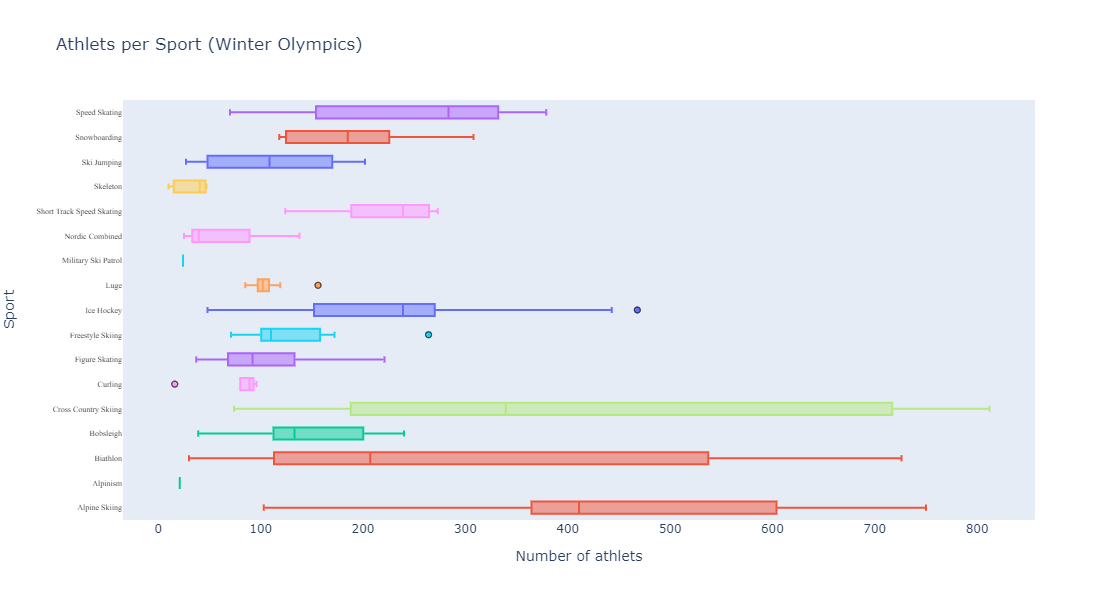

In [96]:
# select only Winter Olympics
df_W = df[df['Season']=='Winter']
# draw the boxplots for the Summer Olympics
draw_group(df_W, "Athlets per Sport (Winter Olympics)",600)

In [97]:
piv = pd.pivot_table(df_W, values="Athlets",index=["Year"], columns=["Sport"], fill_value=0)
m = piv.values

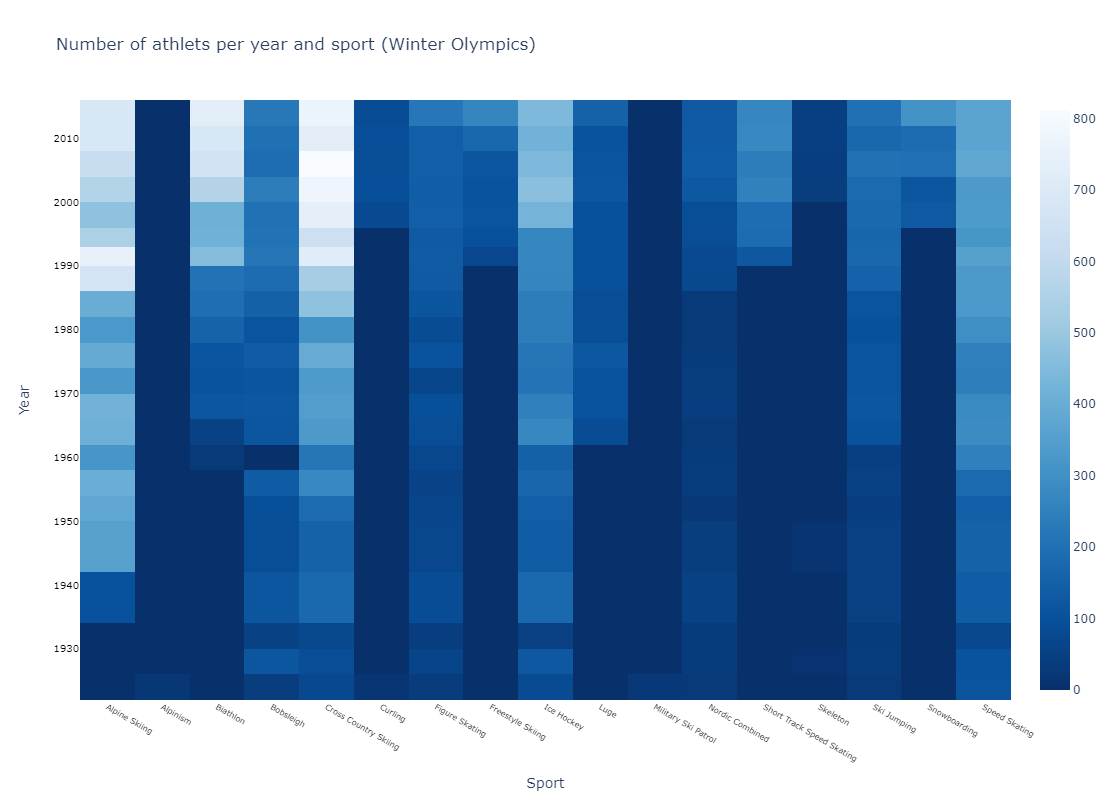

In [98]:
trace = go.Heatmap(z = m, y= list(piv.index), x=list(piv.columns),colorscale='Blues',reversescale=True)
data=[trace]
layout = dict(title = "Number of athlets per year and sport (Winter Olympics)",
              xaxis = dict(title = 'Sport',
                        showticklabels=True,
                           tickangle = 30,
                        tickfont=dict(
                                size=8,
                                color='black'),
                          ),
              yaxis = dict(title = 'Year', 
                        showticklabels=True, 
                        tickfont=dict(
                            size=10,
                            color='black'),
                      ), 
              hovermode = 'closest',
              showlegend=False,
                  width=800,
                  height=800,
             )
fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')


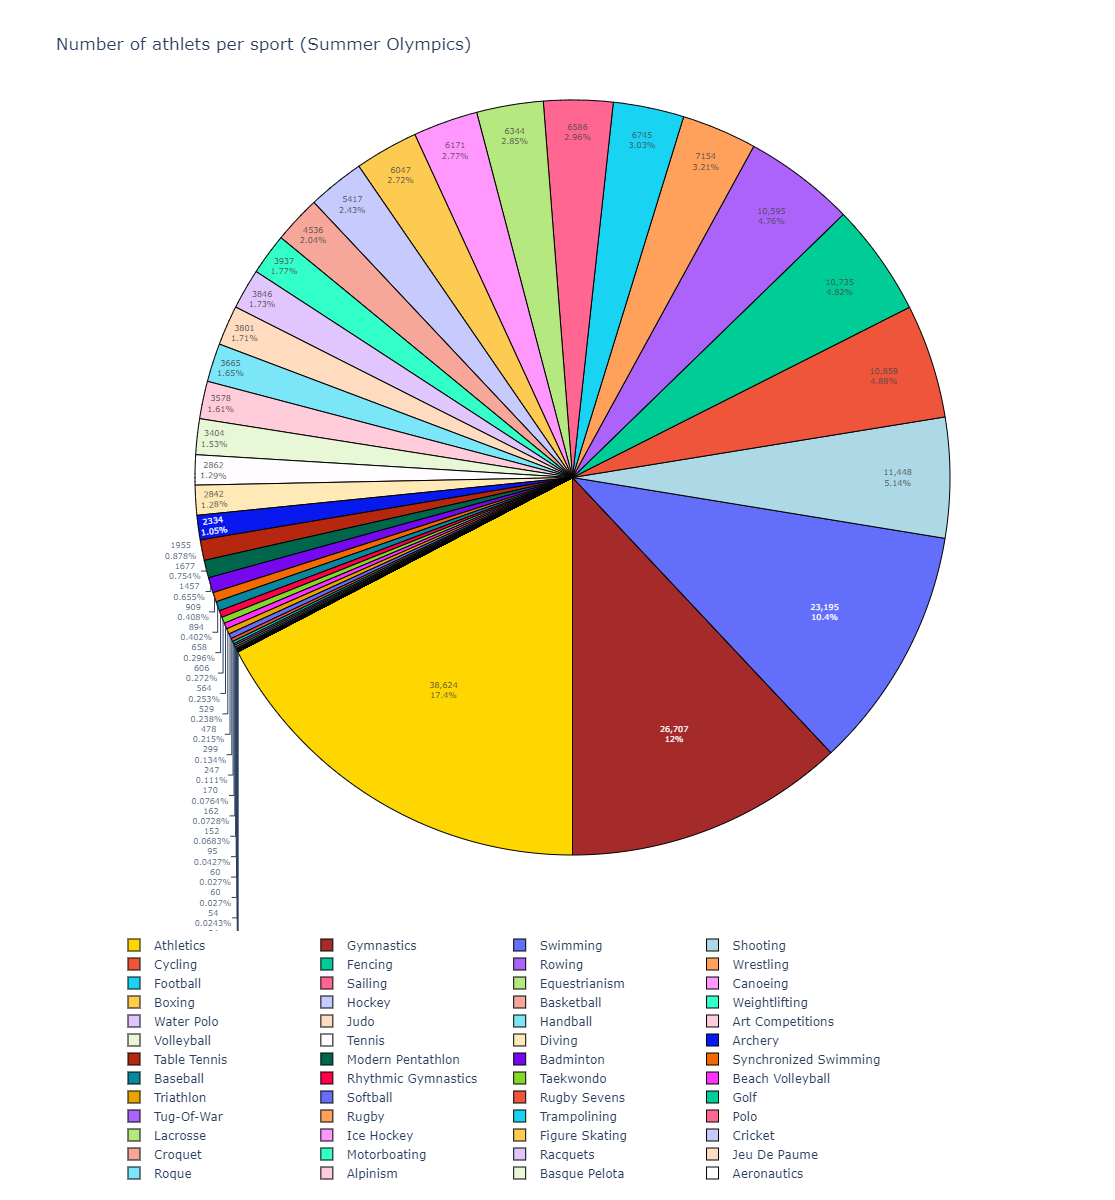

In [102]:
colors = ['gold', 'brown', 'lightblue']
df_S = df[df['Season']=='Summer']

trace = go.Pie(labels=df_S['Sport'], 
               values=df_S['Athlets'],
               hoverinfo='label+value+percent', 
               textinfo='value+percent', 
               textfont=dict(size=8),
               rotation=180,
               marker=dict(colors=colors,line=dict(color='#000000', width=1)
                        )
            )

data = [trace]
layout = dict(title = "Number of athlets per sport (Summer Olympics)",
                  width=800,
                  height=1200,
              legend=dict(orientation="h")
             )
fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_pie_chart')